In [5]:
import sympy as sp
from sympt import *
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.append("/home/leander/GoogleDriveSync/PhD/Python/")

from Packages.utils import multivariable_taylor_series
from Elliptical_Well import EllipticalConfinement
from Cylindrical_Magnet import CylindricalMagnet, BLinear


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

# Transparent background for figures but keep the legend background white but its text color black
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'none'
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.shadow'] = False
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'
# White spins, axis and ticks 
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'


In [18]:
H_conf = EllipticalConfinement()

In [27]:
integral_expansion_order = 7
taylor_expansion_orders = [3, 3, 2] # x, y, z

In [28]:
x, y = sp.symbols('x y', real=True)
r_QD = sp.Matrix([x, y, 0])

Lx = sp.symbols('L_x', real=True, positive=True)

Dx, Dy, Dz = sp.symbols('Delta_x Delta_y Delta_z', real=True)
R, L = sp.symbols('R L', real=True)
Skyrmion = CylindricalMagnet(R * Lx, L * Lx, sp.Matrix([Dx * Lx, Dy * Lx, Dz * Lx]))
Bx, By, Bz = Skyrmion.B_integral_expansion(r_QD, order=integral_expansion_order)

In [29]:
Bx

-2*B0*L_x*R*(-Delta_x*L_x + x)*(15015*pi*L_x**7*R**7*((-Delta_x*L_x + x)**2 + (-Delta_y*L_x + y)**2)**3/(2048*(L_x**2*R**2 + (-Delta_x*L_x + x)**2 + (-Delta_y*L_x + y)**2 + (-Delta_z*L_x + L*L_x/2)**2)**(15/2)) - 15015*pi*L_x**7*R**7*((-Delta_x*L_x + x)**2 + (-Delta_y*L_x + y)**2)**3/(2048*(L_x**2*R**2 + (-Delta_x*L_x + x)**2 + (-Delta_y*L_x + y)**2 + (-Delta_z*L_x - L*L_x/2)**2)**(15/2)) + 315*pi*L_x**5*R**5*((-Delta_x*L_x + x)**2 + (-Delta_y*L_x + y)**2)**2/(128*(L_x**2*R**2 + (-Delta_x*L_x + x)**2 + (-Delta_y*L_x + y)**2 + (-Delta_z*L_x + L*L_x/2)**2)**(11/2)) - 315*pi*L_x**5*R**5*((-Delta_x*L_x + x)**2 + (-Delta_y*L_x + y)**2)**2/(128*(L_x**2*R**2 + (-Delta_x*L_x + x)**2 + (-Delta_y*L_x + y)**2 + (-Delta_z*L_x - L*L_x/2)**2)**(11/2)) + 15*pi*L_x**3*R**3*((-Delta_x*L_x + x)**2 + (-Delta_y*L_x + y)**2)/(16*(L_x**2*R**2 + (-Delta_x*L_x + x)**2 + (-Delta_y*L_x + y)**2 + (-Delta_z*L_x + L*L_x/2)**2)**(7/2)) - 15*pi*L_x**3*R**3*((-Delta_x*L_x + x)**2 + (-Delta_y*L_x + y)**2)/(16*(L_x**2*

In [21]:
print('Bx')    
Bx_linear = BLinear(Bx, taylor_expansion_orders[0], [x, y], [0, 0], 'b_x', {x: H_conf.x, y: H_conf.y})
print('By')
By_linear = BLinear(By, taylor_expansion_orders[1], [x, y], [0, 0], 'b_y', {x: H_conf.x, y: H_conf.y})
print('Bz')
Bz_linear = BLinear(Bz, taylor_expansion_orders[2], [x, y], [0, 0], 'b_z', {x: H_conf.x, y: H_conf.y})

print('Done')

Bx
By
Bz
Done


# Perturbation Regimes

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

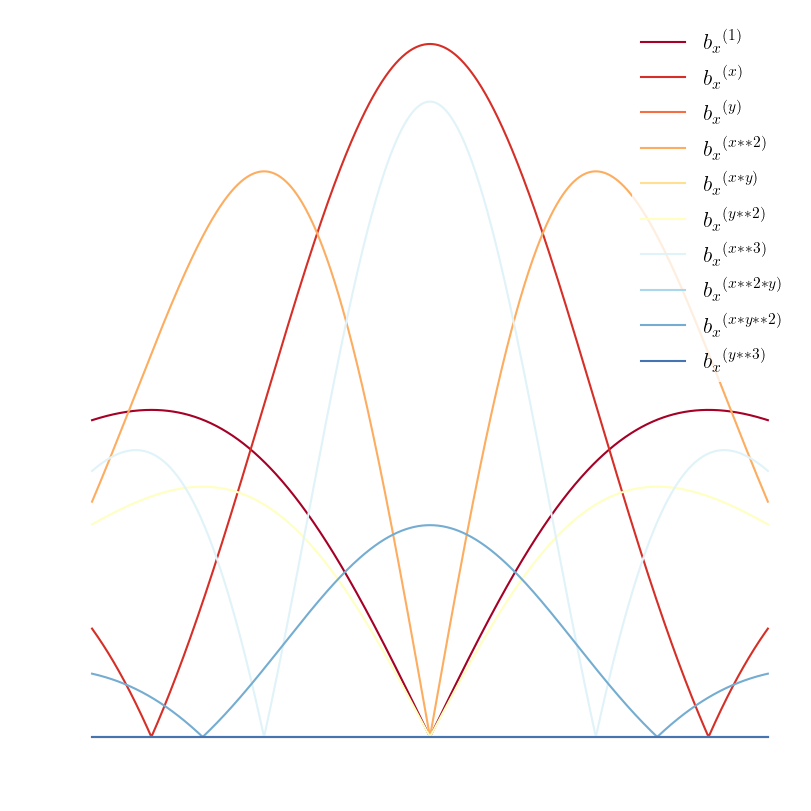

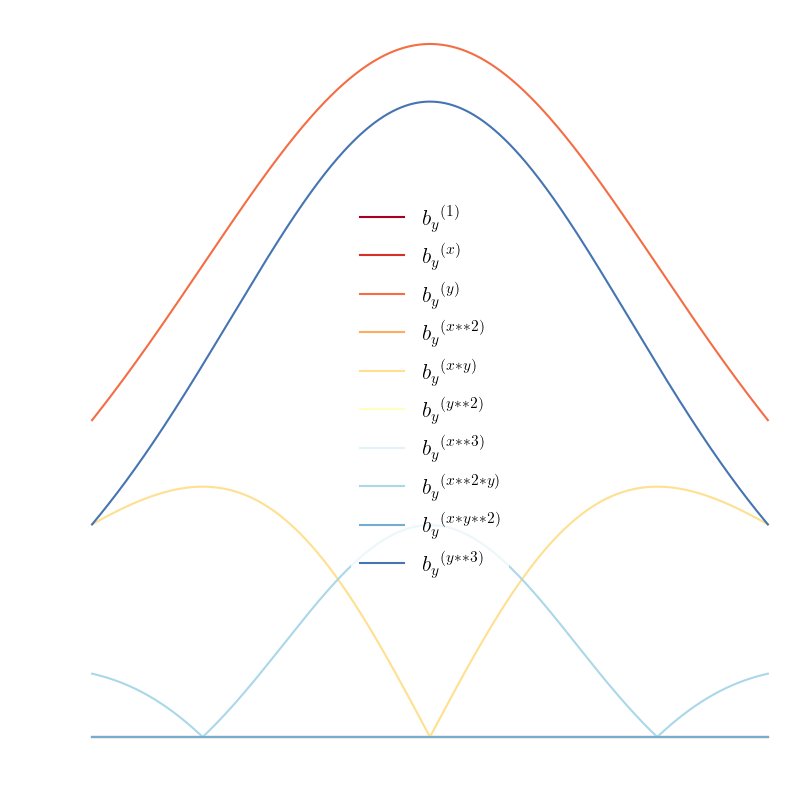

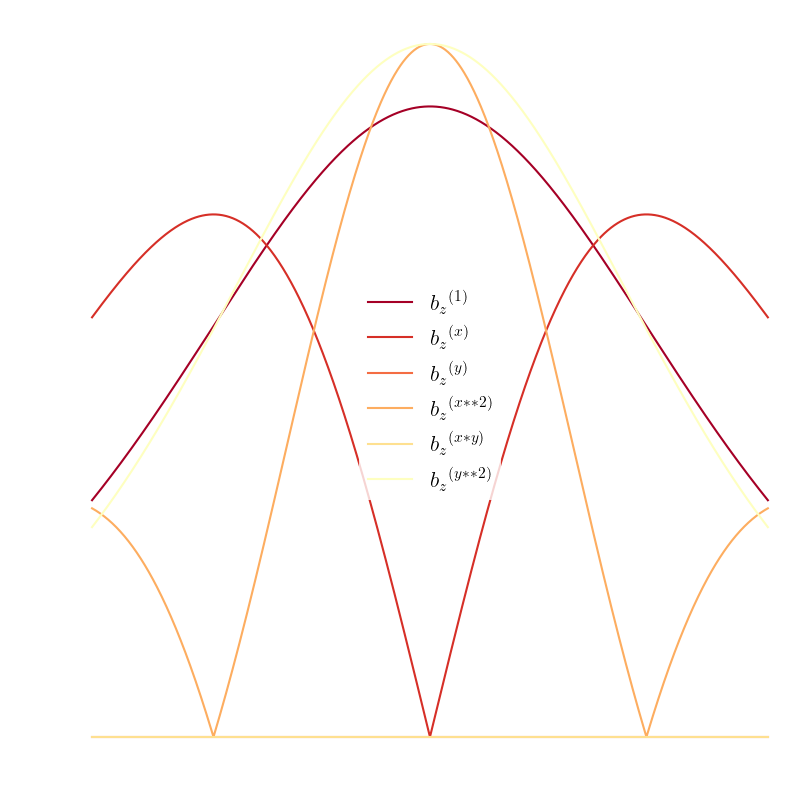

In [30]:
Dr = sp.symbols('Delta_r', real=True, positive=True)
xi_p = sp.symbols('xi_+', real=True, positive=True)
xi_m = sp.symbols('xi_-', real=True, positive=True)
phi = sp.symbols('phi', real=True)

lx = 60

values = {
    R : 0.35,
    L : 0.83,
    Dz : 1.7,
    Dx : Dr * sp.cos(phi),
    Dy : Dr * sp.sin(phi),
    Skyrmion.B0 : 1,
    Lx : 1,
    'Dr' : 12/lx * 0.1,
}

display_dict(values)

order_lambda = 1/5


cmap = plt.get_cmap('RdYlBu')

Drs = np.linspace(-1, 1, 1000)
phis = np.ones_like(Drs)* 0# np.pi/4


# Bx
fig, ax = plt.subplots(1, 1, figsize=(8, 8), constrained_layout=True)


for i, (key, value) in enumerate(Bx_linear.B_linear_values.items()):
    b_, _, _ = value
    b = sp.lambdify([Dr, phi], b_.subs(values), 'numpy')
    key = '$' + sp.latex(key) + '$'

    eff_B = np.abs(b(Drs, phis))
    ax.plot(Drs, eff_B, color=cmap(i / len(Bx_linear.B_linear_values)), label=key)
    #ax.plot(Drs, freq_series / omega_x * np.ones_like(Drs), color=cmap(i / len(Bx_linear.B_linear_values)), ls = '--')

ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(8, 8), constrained_layout=True)

for i, (key, value) in enumerate(By_linear.B_linear_values.items()):
    b_, _, _ = value
    b = sp.lambdify([Dr, phi], b_.subs(values), 'numpy')
    key = '$' + sp.latex(key) + '$'

    eff_B = np.abs(b(Drs, phis))

    ax.plot(Drs, eff_B, color=cmap(i / len(Bx_linear.B_linear_values)), label=key)

ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(8, 8), constrained_layout=True)

for i, (key, value) in enumerate(Bz_linear.B_linear_values.items()):
    b_, _, _ = value
    b = sp.lambdify([Dr, phi], b_.subs(values), 'numpy')
    key = '$' + sp.latex(key) + '$'

    eff_B = np.abs(b(Drs, phis))

    ax.plot(Drs, eff_B, color=cmap(i / len(Bx_linear.B_linear_values)), label=key)

ax.legend()


# Check error orders

In [51]:
import sympy as sp
from sympt import *

integral_expansion_order = 1#sp.Symbol('k', integer=True, positive=True)


Dx, Dy, Dz = sp.symbols('Delta_x Delta_y Delta_z', real=True)
r, R, L, Dr, phi = sp.symbols('r R L Delta_r phi', real=True, positive=True)
Cp, Cm = sp.symbols('C_+ C_-', real=True, positive=True)

epsilon_p = (2 * R * r) * 1 / (R**2 + r**2 + Cp**2)
epsilon_m = (2 * R * r) * 1 / (R**2 + r**2 + Cm**2)

rp_max = sp.solve(sp.diff(epsilon_p,r), r)[0]
rm_max = sp.solve(sp.diff(epsilon_m,r), r)[0]

display_dict({
    'r_+': rp_max,
    'r_-': rm_max
})

coeff = sp.binomial(-sp.Rational(1,2), integral_expansion_order) * (sp.factorial2(integral_expansion_order) / sp.factorial2(integral_expansion_order+1)) * 2 * R * sp.pi

b = sp.sqrt(2 * R * r)
a_p = sp.sqrt(R**2 + r**2 + Cp**2)
a_m = sp.sqrt(R**2 + r**2 + Cm**2)

epsilon_p_max = coeff * (b**(2*(integral_expansion_order)) / a_p**(2*(integral_expansion_order) + 1)).subs(r, rp_max).simplify()
epsilon_m_max = coeff * (b**(2*(integral_expansion_order)) / a_m**(2*(integral_expansion_order) + 1)).subs(r, rm_max).simplify()

(epsilon_p_max/rp_max - epsilon_m_max/rm_max)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

sqrt(2)*pi*R**2/(4*(C_-**2 + R**2)**(3/2)) - sqrt(2)*pi*R**2/(4*(C_+**2 + R**2)**(3/2))

In [52]:
rho = sp.symbols('rho', real=True, positive=True)
sp.solve(sp.sqrt(rho**2 + Dr**2 - 2*rho*Dr*sp.cos(phi)) - rm_max, rho)[1].subs(phi, sp.pi)

-Delta_r + sqrt(C_-**2 + R**2)

In [53]:
x, y = sp.symbols('x y', real=True)
r_QD = sp.Matrix([x, y, 0])

Skyrmion = CylindricalMagnet(R, L, sp.Matrix([0, 0, Dz]))

In [54]:

Skyrmion.B0 = 1
Bx, By, Bz = Skyrmion.B_integral_expansion(r_QD, order=integral_expansion_order)
Bx_integral = sp.lambdify([x, y, R, L, Dz], Bx, 'numpy')
By_integral = sp.lambdify([x, y, R, L, Dz], By, 'numpy')
Bz_integral = sp.lambdify([x, y, R, L, Dz], Bz, 'numpy')

Bz_integral(0, 0, 1, 1, 1)

np.float64(2.418000291801699)

In [57]:
2025 - 1976

49

In [55]:
Bx

-2*R*x*(pi*R/(2*(R**2 + x**2 + y**2 + (-Delta_z + L/2)**2)**(3/2)) - pi*R/(2*(R**2 + x**2 + y**2 + (-Delta_z - L/2)**2)**(3/2)))

In [56]:
multivariable_taylor_series(Bx, [x, y], [0, 0], 3, return_dict=False)

pi*R**2*x**3*(-3/(R**2 + (2*Delta_z + L)**2/4)**(5/2) + 3/(R**2 + (2*Delta_z - L)**2/4)**(5/2))/2 + 3*pi*R**2*x*y**2*(-1/(R**2 + (2*Delta_z + L)**2/4)**(5/2) + (R**2 + (2*Delta_z - L)**2/4)**(-5/2))/2 - 2*R*x*(pi*R/(2*(R**2 + (-Delta_z + L/2)**2)**(3/2)) - pi*R/(2*(R**2 + (-Delta_z - L/2)**2)**(3/2)))

In [79]:
values = {'L': 0.83, 'R':0.35, 'position': [0, 0, 1.7], 'B0' : 1}

Dr_val = np.sqrt(values['position'][0]**2 + values['position'][1]**2)
Dz_val = values['position'][2]
L_val = values['L']
Cp_val = -Dz_val + L_val/2
Cm_val = -Dz_val - L_val/2

rp_max_val = float(rp_max.subs({R: values['R'], Cp: Cp_val}))
rm_max_val = float(rm_max.subs({R: values['R'], Cm: Cm_val}))

display_dict({
    'r_+': rp_max_val,
    'r_-': rm_max_val,
})

rs = np.linspace(-2*min(rp_max_val, rm_max_val), 2*min(rp_max_val, rm_max_val), 100)
phis = np.ones_like(rs) * 0

Bx_exact = np.zeros_like(rs)
By_exact = np.zeros_like(rs)
Bz_exact = np.zeros_like(rs)

Bx_integral_values = np.zeros_like(rs)
By_integral_values = np.zeros_like(rs)
Bz_integral_values = np.zeros_like(rs)

for i, (r, phi) in tqdm(enumerate(zip(rs, phis))):
    Bx_exact[i], By_exact[i], Bz_exact[i] = Skyrmion.B(values, np.array([r*np.cos(phi), r*np.sin(phi), 0]))
    Bx_integral_values[i] = Bx_integral(r*np.cos(phi), r*np.sin(phi), values['R'], values['L'], values['position'][2])
    By_integral_values[i] = By_integral(r*np.cos(phi), r*np.sin(phi), values['R'], values['L'], values['position'][2])
    Bz_integral_values[i] = Bz_integral(r*np.cos(phi), r*np.sin(phi), values['R'], values['L'], values['position'][2])


<IPython.core.display.Math object>

<IPython.core.display.Math object>

100it [00:00, 929.58it/s]


AttributeError: 'float' object has no attribute 'subs'

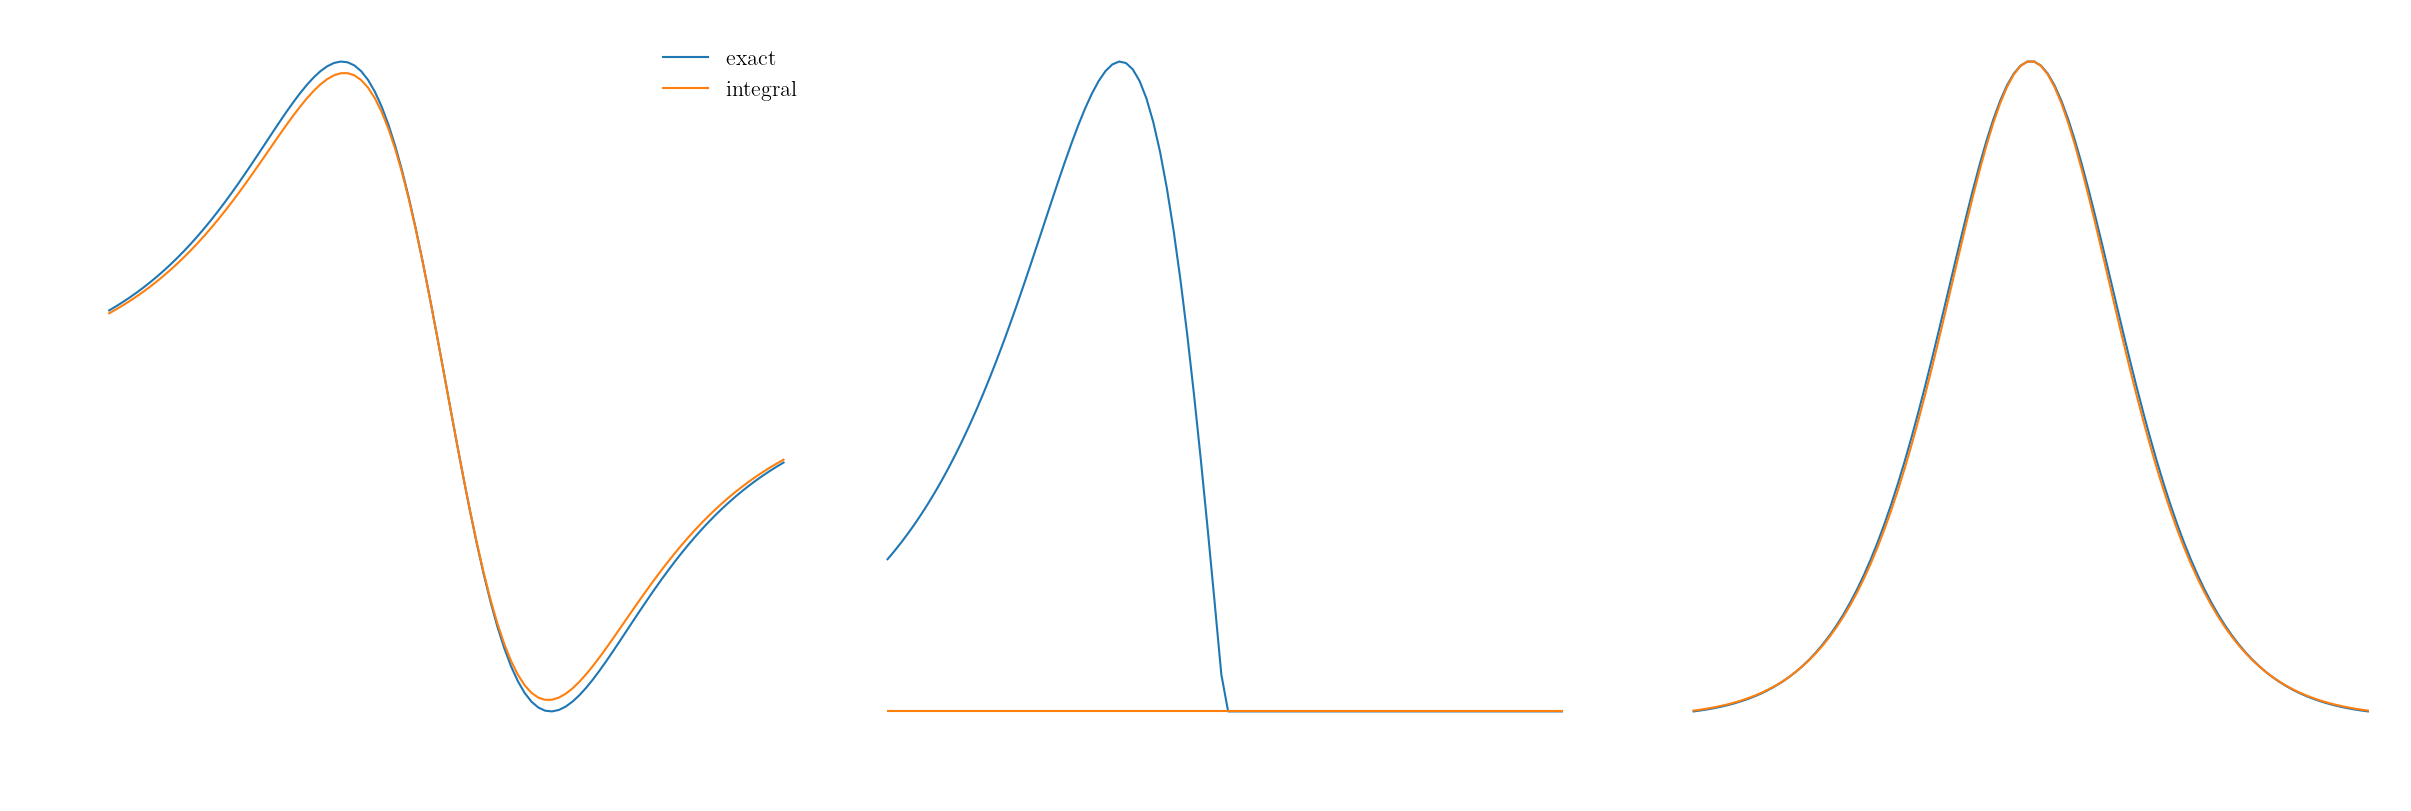

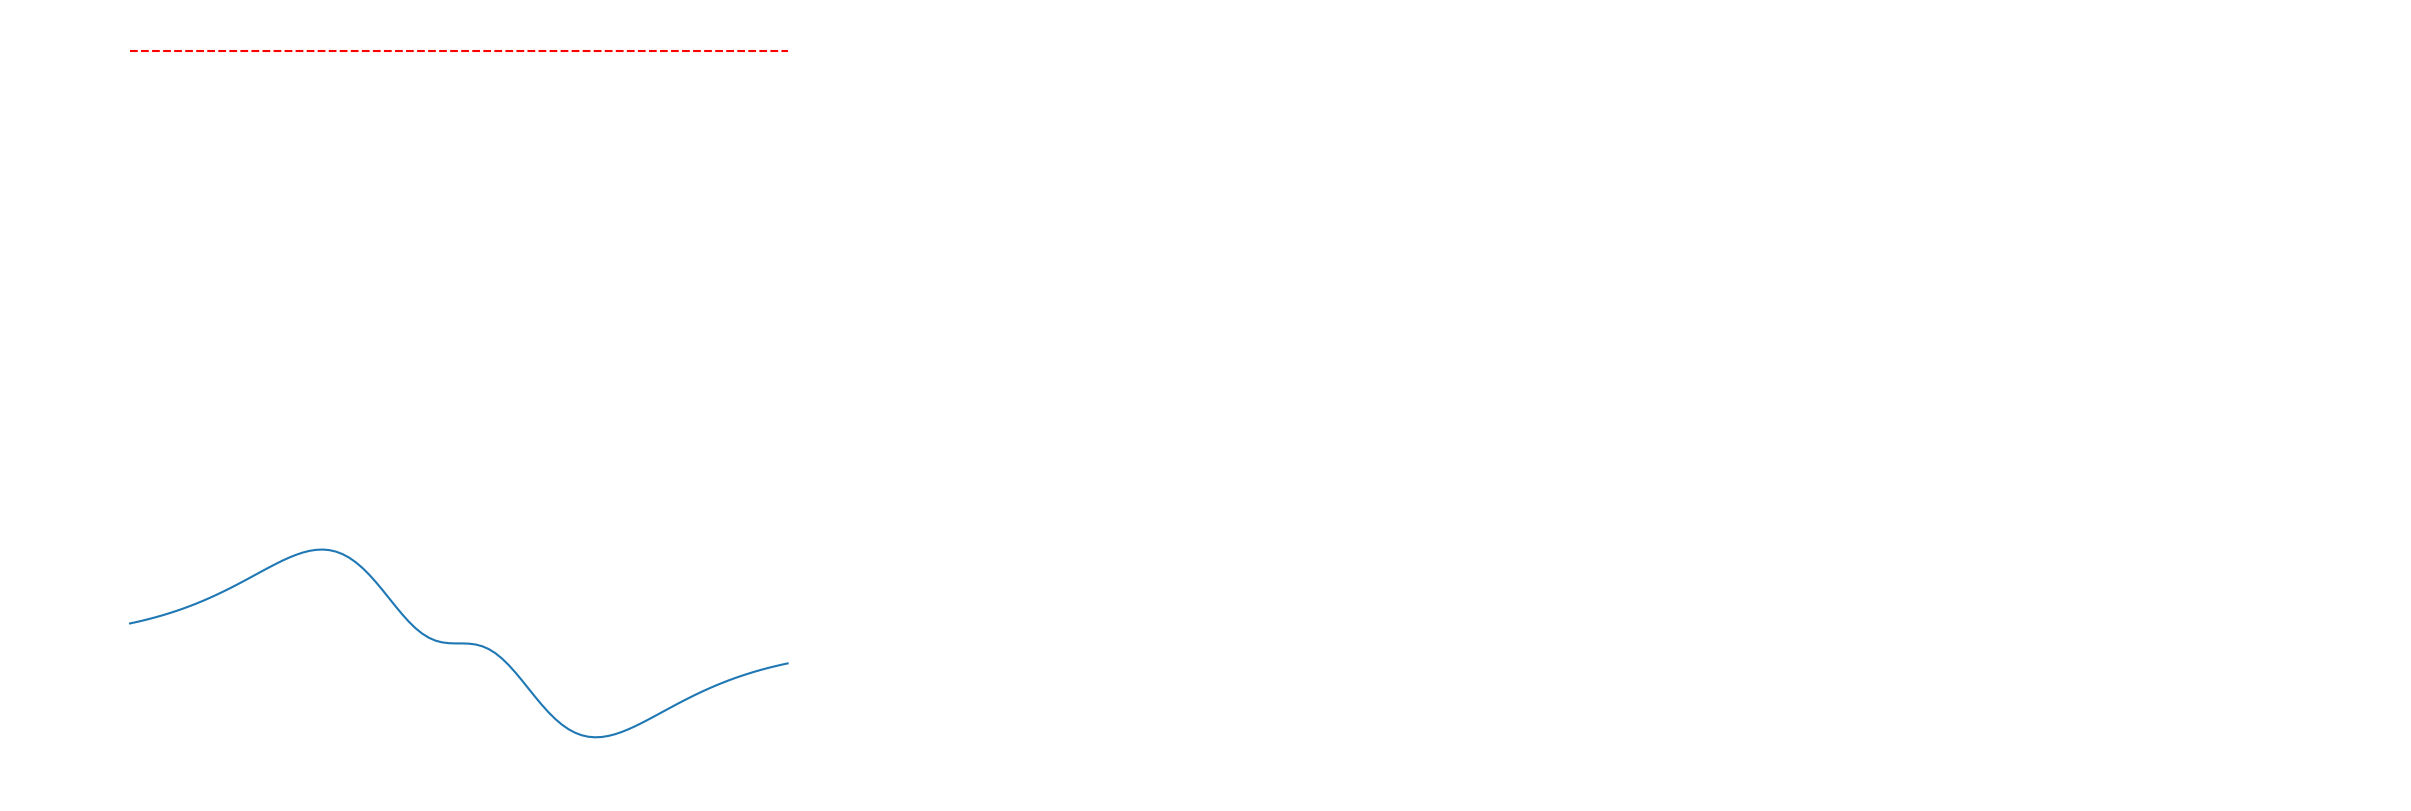

In [82]:
fig, ax = plt.subplots(1, 3, figsize=(24, 8), constrained_layout=True)
ax[0].plot(rs, Bx_exact, label='exact')
ax[0].plot(rs, Bx_integral_values, label='integral')

ax[1].plot(rs, By_exact)
ax[1].plot(rs, By_integral_values)

ax[2].plot(rs, Bz_exact)
ax[2].plot(rs, Bz_integral_values)

ax[0].legend()

for a in ax:
    a.set_xlabel('$r$')

fig, ax = plt.subplots(1, 3, figsize=(24, 8), constrained_layout=True)

ax[0].plot(rs, Bx_exact - Bx_integral_values)
ax[0].hlines((epsilon_p_max - epsilon_m_max).subs({
    R: values['R'],
    Cp: Cp_val,
    Cm: Cm_val
}), rs[0], rs[-1], color='red', ls='--')
ax[0].vlines([rp_max_val.subs({
    R: values['R'],
    Cp: Cp_val,
    Cm: Cm_val
}), rm_max_val.subs({
    R: values['R'],
    Cp: Cp_val,
    Cm: Cm_val
})], -1, 1, color='red', ls='--')
ax[1].plot(rs, By_exact - By_integral_values)
ax[2].plot(rs, Bz_exact - Bz_integral_values)